In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%config Inlinebackend.figure_format = 'retina'
#더 높은 해상도로 출력한다.


In [2]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head

(10886, 12)


<bound method NDFrame.head of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0    

In [3]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [4]:
#datetime 컬럼을 datetime 자료형으로 변환 연,월,일,시,분,초 까지 6개 칼럼 생성
# to_datetime 활용

train['datetime'] = pd.to_datetime(train['datetime'])


In [5]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [7]:
# 연,월,일,시,분,초 칼럼생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0


<AxesSubplot:xlabel='second', ylabel='count'>

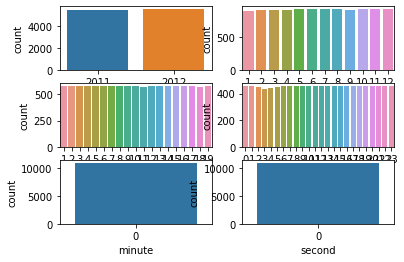

In [31]:
# year, month, day, hour, minute, second 데이터 개수 시각화 하기


plt.subplot(3,2,1)   
sns.countplot(x='year', data=train)
plt.subplot(3,2,2)   
sns.countplot(x='month', data=train)
plt.subplot(3,2,3)
sns.countplot(x='day', data=train)
plt.subplot(3,2,4)
sns.countplot(x='hour', data=train)
plt.subplot(3,2,5)
sns.countplot(x='minute', data=train)
plt.subplot(3,2,6)
sns.countplot(x='second', data=train)
    


In [21]:
type(train)

pandas.core.frame.DataFrame

In [35]:
# 결측치 확인
train.isnull().sum()
# 결측치 없음

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [37]:
# 데이터 전처리
# 데이터값이 하나인 minute, second 제거
# 동일한 year이므로 year도 영향을 주지 않을 것 같으므로 제거 
# temp 와 atemp도 거의 같으므로 제거 영향을 주지 않을 것으로 예상
# data time 도 변환 하였으므로 제거
# casual과 registered 값의 합이 count 인지 전행에 대하여 확인후 동일하면 두개칼럼 제거
# Target 데이터인 count 제거후 target 변수에 저장

C_R = ["casual", "registered"]
#모든 인덱스에 대해 맞는지 확인
sum(train['count'].values == train[C_R].values.sum(axis=1))
# 모든 인덱스에 대해 맞음 제거



10886

In [38]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [39]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
            'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
target = 'count'

# X변수에 feature 컬럼에 해당하는 데이터를 담음.
X = train[features]
print(X.shape)
# y 변수에 target 컬럼에 해당하는 데이터를 담음
y = train[target]
print(y.shape)


(10886, 11)
(10886,)


In [41]:
# sklearn 의 LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression
print('d')

d


In [42]:
# 학습데이터와 테스트데이터로 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(8708, 11) (8708,)
(2178, 11) (2178,)


In [46]:
# 모델 정의, 모델 학습 시키기
model = LinearRegression()
model.fit(X_train, y_train)
print('d')

d


In [48]:
#학습된 모델에 X_test를 입력해서 예측값 출력하기
X_pred = model.predict(X_test)
X_pred

array([245.59971664, 210.56191802, 233.2342582 , ..., 171.18166176,
       251.36748774,   6.12448782])

In [49]:
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
# 모델의 성능 확인 사이킷럿 메소드 이용
from sklearn.metrics import mean_squared_error
#손실함수 mse값 확인
mse = mean_squared_error(y_test, X_pred)
mse

20420.630896090173

In [50]:
#rmse 는 mse의루트 값이으모
rmse = mse**0.5
rmse

142.90077290235408

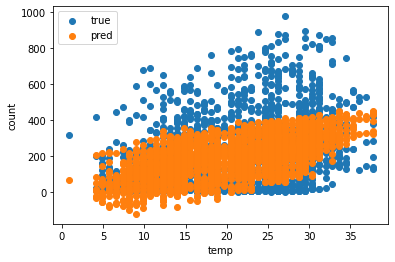

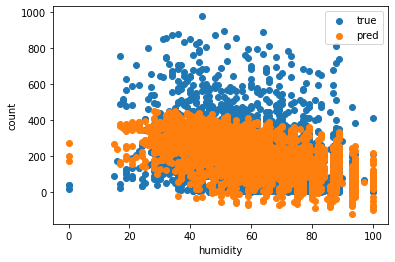

In [54]:
# 예측값 시각화
# x축에 temp, y 축에 count로 시각화

plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], X_pred, label="pred")
plt.legend()
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], X_pred, label="pred")
plt.legend()
plt.xlabel('humidity')
plt.ylabel('count')
plt.show()